In [1]:
# MNIST, Sklearn, Tensorflow 2.x으로 구현

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings(action='ignore')

In [4]:
# Raw Data Loading
df = pd.read_csv('../data/digit-recognizer/train.csv')

# 결측치와 이상치를 처리해야함
# feature engineering - 학습에 필요없는 column을 삭제, 
# 기존 column을 이용해서 새로운 column을 생성
# Binning 처리 (연속적인 숫자값을 categorical value로 변환)

# 독립변수와 종속변수 분리
x_data = df.drop('label', axis=1, inplace=False)
t_data = df['label']

# 정규화
scaler = MinMaxScaler()
# df넣으면 알아서 ndarray로 변환하여 사용
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data, test_size=0.3, random_state=0)

# Sklearn 구현

# LogisticRegression은 solver를 지정해야 한다
# 어떠한 형태로 모델을 만들것인지 (상대적으로 데이터의 크기 유무 - 많고, 적고)
# default인 lbfgs는 작은 데이터에 최적화 > 데이터가 많으면 성능이 떨어진다
# 현재 4만개의 데이터가 있기 때문에 작은 데이터는 아니다 
# 일반적으로 데이터량이 많은 경우는 saga를 이용
# sag > Stochastic Average Gradient Descent , saga는 sag의 확장판
sklearn_model = LogisticRegression(solver='saga')
sklearn_model.fit(x_data_train, t_data_train)
print('sklearn result : ')
print(classification_report(t_data_test, sklearn_model.predict(x_data_test)))

sklearn result : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1242
           1       0.95      0.97      0.96      1429
           2       0.92      0.90      0.91      1276
           3       0.91      0.90      0.90      1298
           4       0.92      0.92      0.92      1236
           5       0.88      0.88      0.88      1119
           6       0.93      0.96      0.94      1243
           7       0.94      0.93      0.94      1334
           8       0.89      0.88      0.88      1204
           9       0.89      0.89      0.89      1219

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [5]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
# Tensorflow 2.x 구현
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import warnings

In [11]:
# Raw Data Loading
df = pd.read_csv('../data/digit-recognizer/train.csv')

# 독립변수와 종속변수 분리
x_data = df.drop('label', axis=1, inplace=False)
t_data = df['label']
# TF 1.x에선 one-hot해야함
# TF 2.x에선 설정만 하면 one-hot처리를 안해도 됨

# 정규화
scaler = MinMaxScaler()
# df넣으면 알아서 ndarray로 변환하여 사용
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data, test_size=0.3, random_state=0)

# Tensorflow 2.x
keras_model = Sequential()
keras_model.add(Flatten(input_shape=(x_data_train.shape[1],)))
keras_model.add(Dense(10, activation='softmax'))

# one-hot을 사용하지 않은 경우 sparse_categorical_crossentropy
keras_model.compile(optimizer=SGD(learning_rate=1e-1), 
                    loss='sparse_categorical_crossentropy',
                    metrics=['sparse_categorical_accuracy'])

# 추후에 history를 이용해서 조절
# verbose는 출력 옵션, 어떠한 내용을 출력할 것인가
history = keras_model.fit(x_data_train, t_data_train, 
                          epochs=100, batch_size=512, verbose=0, 
                          validation_split=0.2)

print(keras_model.evaluate(x_data_test, t_data_test))

394/394 [==============================] - 0s 409us/step - loss: 0.2963 - sparse_categorical_accuracy: 0.9171
[0.2962534427642822, 0.9171428680419922]


<class 'dict'>
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


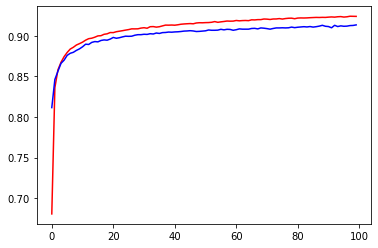

In [23]:
# history객체 내에 history라는 속성이 있다 > dict
print(type(history.history))
# epoch당 각 key값에 대한 정보가 담겨있다
print(history.history.keys())

# epoch당 training data를 이용한 sparse_categorical_accuracy
plt.plot(history.history['sparse_categorical_accuracy'], color='r')

# epoch당 validation data를 이용한 val_sparse_categorical_accuracy
plt.plot(history.history['val_sparse_categorical_accuracy'], color='b')
plt.show()

In [27]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [28]:
# Logistic Regression(Perceptron)
# And, OR Gate를 학습시켜서 Prediction을 할 수 있는가?
# Tensorflow 1.15를 이용해서 학습

import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import classification_report
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


- And Gate

In [29]:
# Trainin Data Set
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)

# AND t_data
t_data = np.array([[0], [0], [0], [1]], dtype=np.float32)

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
T = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# W & b
W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)

# Session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [31]:
for step in range(30000):
    _, loss_val = sess.run([train, loss], feed_dict={X : x_data, T: t_data})
    
    if step % 3000 == 0:
        print('loss : {}'.format(loss_val))

loss : 1.0008327960968018
loss : 0.334287166595459
loss : 0.2172527015209198
loss : 0.1624193787574768
loss : 0.1296493262052536
loss : 0.10770364105701447
loss : 0.09196663647890091
loss : 0.0801398754119873
loss : 0.07093765586614609
loss : 0.06358186900615692


In [34]:
# Accuracy
accuracy = tf.cast(H >= 0.5, dtype=tf.float32)

result = sess.run(accuracy, feed_dict={X: x_data})
print(classification_report(t_data, result.ravel()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



- OR Gate

In [35]:
# Trainin Data Set
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)

# OR t_data
t_data = np.array([[0], [1], [1], [1]], dtype=np.float32)

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
T = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# W & b
W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)

# Session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [36]:
for step in range(30000):
    _, loss_val = sess.run([train, loss], feed_dict={X : x_data, T: t_data})
    
    if step % 3000 == 0:
        print('loss : {}'.format(loss_val))

loss : 0.41868582367897034
loss : 0.20556461811065674
loss : 0.13196562230587006
loss : 0.09587672352790833
loss : 0.0747547447681427
loss : 0.06101207807660103
loss : 0.0514104887843132
loss : 0.04434897378087044
loss : 0.03895070403814316
loss : 0.03469713777303696


In [37]:
# Accuracy
accuracy = tf.cast(H >= 0.5, dtype=tf.float32)

result = sess.run(accuracy, feed_dict={X: x_data})
print(classification_report(t_data, result.ravel()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



- XOR Gate

In [38]:
# Trainin Data Set
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)

# XOR t_data
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
T = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# W & b
W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)

# Session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [39]:
for step in range(30000):
    _, loss_val = sess.run([train, loss], feed_dict={X : x_data, T: t_data})
    
    if step % 3000 == 0:
        print('loss : {}'.format(loss_val))

loss : 0.7997751832008362
loss : 0.7003811597824097
loss : 0.6938228607177734
loss : 0.6932108998298645
loss : 0.6931532025337219
loss : 0.6931477189064026
loss : 0.6931472420692444
loss : 0.6931471824645996
loss : 0.6931471824645996
loss : 0.6931471824645996


In [40]:
# Accuracy
accuracy = tf.cast(H >= 0.5, dtype=tf.float32)

result = sess.run(accuracy, feed_dict={X: x_data})
print(classification_report(t_data, result.ravel()))

# XOR는 구현할 수 없다
# 어떻게 구현해야 하는가?

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

